## *Business Problem* 
- Analytical Report
- To identify which category of person is eligable for loan or not.

#### *Import all the libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### *Data Understanding*

In [5]:
df = pd.read_csv("LoanData.csv")

In [6]:
# To check the first 5 rows and columns in the data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# To check for the total number of rows and columns 
df.shape

(614, 13)

In [8]:
# To check the total number of columns in the data 
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [9]:
# To check for the Data Type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
# To check for the unique values in Loan_ID
df["Loan_ID"].nunique()

614

In [11]:
# Check unique values for Gender Column
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [12]:
# Value count for Gender column 
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [13]:
# Check Unique values for Married column  
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
# Value count for Married column 
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [15]:
# Check Unique values for Department colummn
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [16]:
# Check unique values for Education
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
# Value count for Education column 
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [18]:
# Check unique values for Self_Employed 
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
# Value count for Self_Employed column 
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [20]:
# Check unique values in ApplicantIncome 
df["ApplicantIncome"].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [21]:
# Check for the unique values in CoapplicantIncome
df["CoapplicantIncome"].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [22]:
# Check for the unique values in LoanAmount
df["LoanAmount"].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [23]:
# Check for the unique values in Loan_Amount_Term
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [24]:
# Check for the unique values in Credit_History
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [25]:
# Value count for Credit_History column 
df["Credit_History"].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [26]:
# Check for the unique values in Property_Area 
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [27]:
# Value count for Property_Area column 
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [28]:
# Check for the unique values in Loan_Status 
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [29]:
# Value count for Loan_Status column 
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

**Now seperate the columns on the basis of continous, count, categorical**

In [30]:
continous = ["overall_income","LoanAmount"]
count = ["Dependents","Loan_Amount_Term",]
categorical = ["Gender","Married","Education","Self_Employed","Education","Self_Employed","Credit_History","Property_Area"]

In [31]:
# Since Applicant Income and Coapplicant income are in the same family we can merge them 
df["overall_income"] = df["ApplicantIncome"]+ df["CoapplicantIncome"]

In [32]:
df[continous].describe()

,overall_income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


In [33]:
df[categorical].describe()

,Credit_History
count,564.000000
mean,0.842199
std,0.364878
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [34]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
overall_income        0
dtype: int64

<Axes: xlabel='overall_income'>

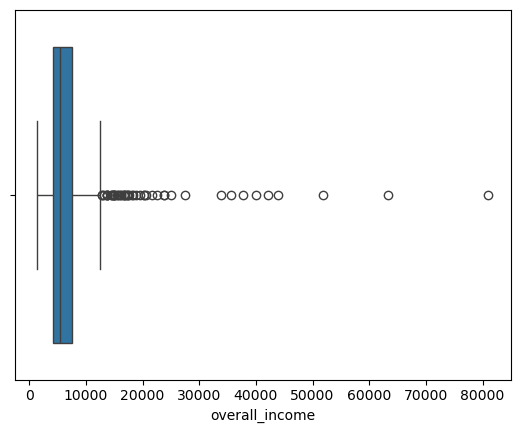

In [35]:
sns.boxplot(data=df, x="overall_income") 

<Axes: xlabel='LoanAmount'>

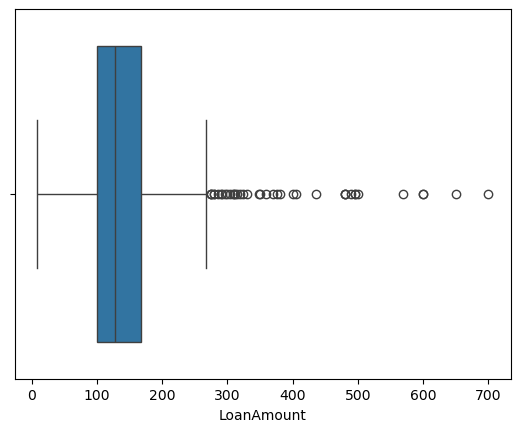

In [36]:
sns.boxplot(data=df, x="LoanAmount") 

In [37]:
df[continous].skew()

overall_income    5.633449
LoanAmount        2.677552
dtype: float64

In [38]:
df.duplicated().sum()

0

In [39]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
overall_income        0
dtype: int64

#### *Data Cleaning*

In [40]:
# Since Loan_ID has every unique value it of no use 
# So  we will drop that
df.drop(columns=["Loan_ID"],inplace=True)

**Replacing ApplicantIncome & CoapplicantIncome**

In [41]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome'], inplace=True)

In [42]:
# Department section was having special characters "+" that needs to be removed 
df["Dependents"].replace({"3+":3},inplace = True)

**Treating the missing values ----- categorical columns**

In [43]:
# Treating the Gender column with mode
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Treating the Married column with mode
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Treating the Dependents column with mode
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Treating the Self_Employed column with mode
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

**Treating the wrong Data type**

In [44]:
# Since the Dependents needs to be int not object
df["Dependents"] = df["Dependents"].astype('int')

# Since the Loan_Amount_Term needs to be in int not float
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype('Int64')

**Treat the Outliers**

**Retrain the outliers**

## *Data Analysis*
- Formation of EDA Questions
- **Measures + Plots**
- **Univariate** - *single columns*
- **Bivariate** - *Double columns*
- **Multivariate** - *More than 2 columns*

**Univariate**

In [45]:
# 1
# What is the gender distribution for apllicants ?
df["Gender"].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [46]:
# 2 
# What is the percnetage of male and female 
(df['Gender'].value_counts(normalize=True) * 100)

Gender
Male      81.758958
Female    18.241042
Name: proportion, dtype: float64

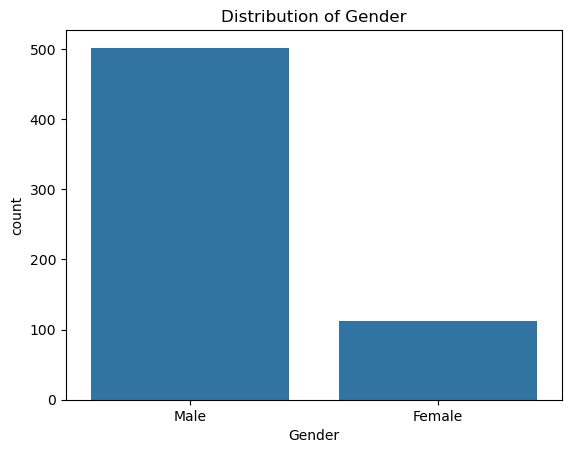

In [47]:
# 3
# Count plot for gender Distribution ?
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.show()

In [48]:
# 4
# How many applicants are married vs. unmarried?
df["Married"].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [49]:
# 5
# What is the percentage distribution of Matrital Status?
(df['Married'].value_counts(normalize=True) * 100)

Married
Yes    65.309446
No     34.690554
Name: proportion, dtype: float64

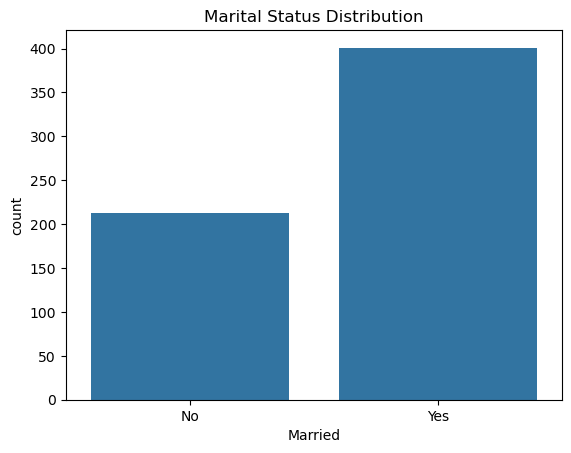

In [50]:
# 6 
# Count plot for married vs unmarried 
sns.countplot(x='Married', data=df)
plt.title('Marital Status Distribution')
plt.show()

In [51]:
# 7
#  What is the education level distribution (Graduate vs. Non-Graduate)?
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [52]:
# 8 
# What is the percentage distribution of Education status?
(df['Education'].value_counts(normalize=True) * 100)

Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64

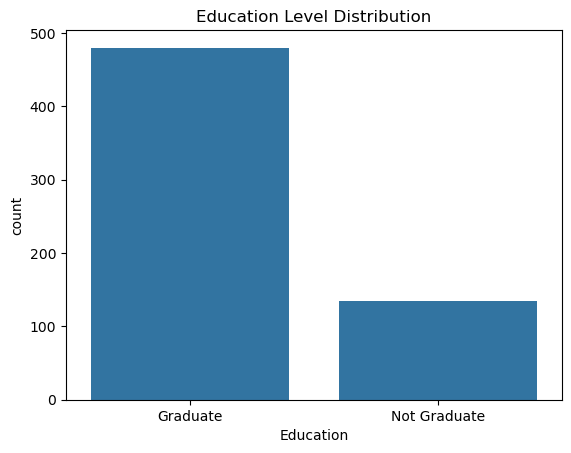

In [53]:
# 9
# Count plot for education distribution
sns.countplot(x='Education', data=df)
plt.title('Education Level Distribution')
plt.show()

In [54]:
# 10
# How many applicants are self-employed?
df["Self_Employed"].value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [55]:
# 11
# What is the percentage distribution of Self Employment status?
(df['Self_Employed'].value_counts(normalize=True) * 100)

Self_Employed
No     86.644951
Yes    13.355049
Name: proportion, dtype: float64

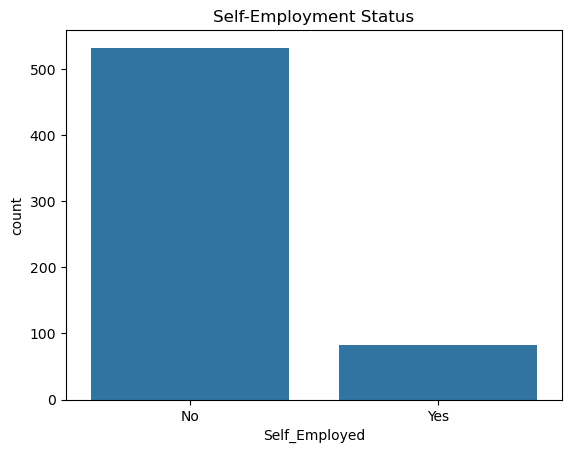

In [56]:
# 12
# Count plot for self employed applicants
sns.countplot(x='Self_Employed', data=df)
plt.title('Self-Employment Status')
plt.show()

In [57]:
# 13
# What is the distribution of Property Area ?
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

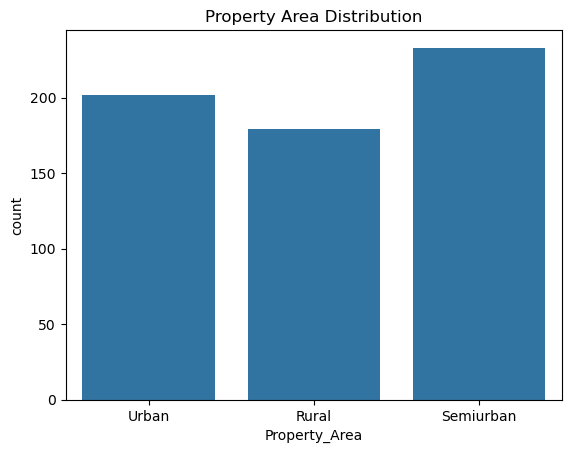

In [58]:
# 14
# Count plot for the property distribution
sns.countplot(x='Property_Area', data=df)
plt.title('Property Area Distribution')
plt.show()

<Axes: ylabel='count'>

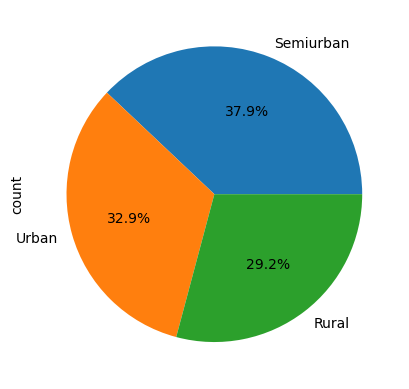

In [59]:
# 15
# Plot a pie chart for Property_Area distribution
df['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')

In [60]:
# 16
# What is the loan approval status distribution
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

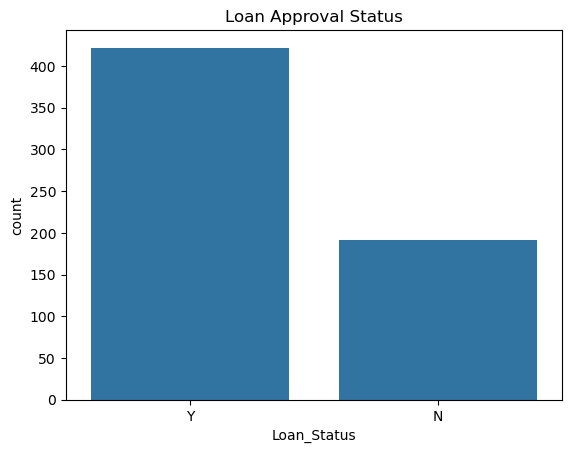

In [61]:
# 17
# Count plot for Loan approval status
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.show()

<Axes: >

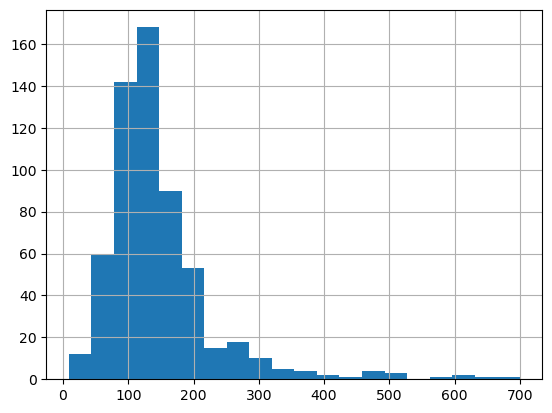

In [62]:
# 18
#  What is the distribution of LoanAmount? 
df['LoanAmount'].hist(bins=20)

<Axes: xlabel='LoanAmount'>

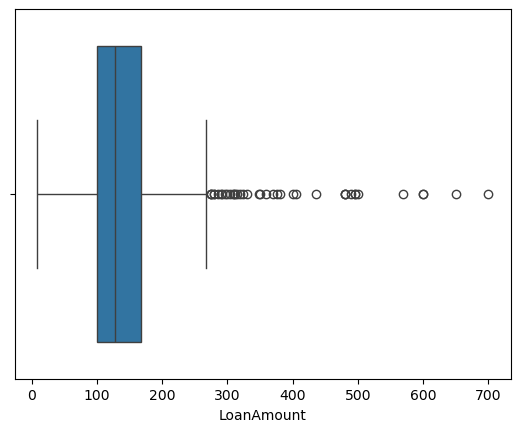

In [63]:
# 19
#Is there any outlier in the LoanAmount column? 
sns.boxplot(x=df['LoanAmount'])

In [64]:
# 20
# What are the summary statistics for LoanAmount?
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [65]:
# 21
#  What are the counts of different Loan Amount Terms?
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360    512
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: count, dtype: Int64

In [66]:
# 22
# What is the skewness of LoanAmount?
print(df['LoanAmount'].skew())

2.677551679256059


<Axes: xlabel='overall_income', ylabel='Count'>

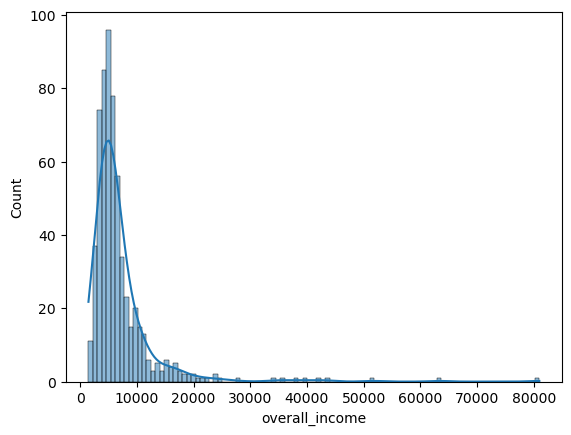

In [67]:
# 23
# What is the distribution of overall income?
sns.histplot(df['overall_income'], kde=True)

**Univariate**

In [68]:
# 24 
# How does gender afftect Loan status
pd.crosstab(df["Gender"],df["Loan_Status"])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [69]:
# 25 
# How does gender afftect Loan status in percentage 
pd.crosstab(df["Gender"],df["Loan_Status"],normalize = "index")*100

Loan_Status,N,Y
Gender,,
Female,33.035714,66.964286
Male,30.876494,69.123506


<Axes: xlabel='Gender', ylabel='count'>

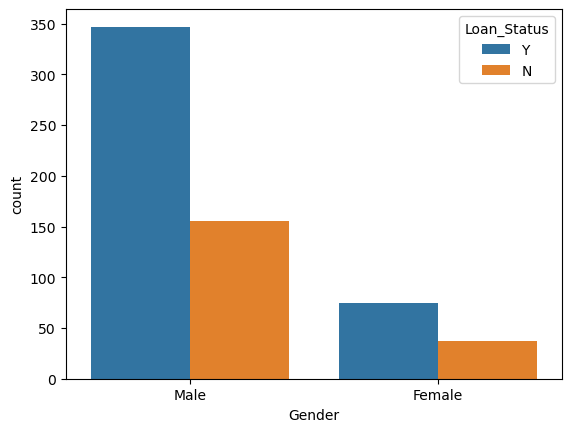

In [70]:
# 26
# Count plot to show how gender afftect Loan status
sns.countplot(x="Gender", hue = "Loan_Status",data = df)

In [71]:
#27
# HOw does Marital Status afftect Loan Status
pd.crosstab(df["Married"],df["Loan_Status"])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


<Axes: xlabel='Married', ylabel='count'>

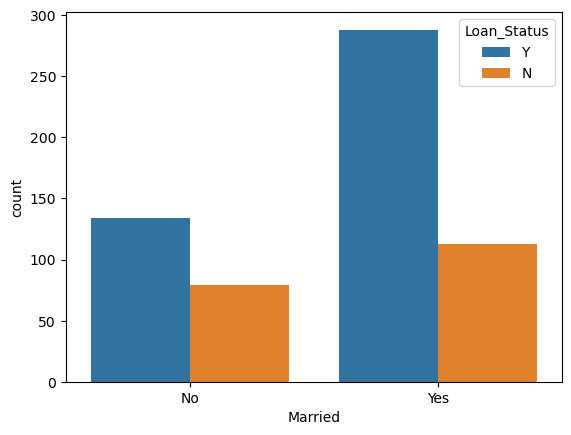

In [72]:
#28
# Count plot for  Marital Status afftect Loan Status 
sns.countplot(x="Married", hue ="Loan_Status", data = df)

In [73]:
# 29
# What is the relationship between Edication and loan status
pd.crosstab(df["Education"],df["Loan_Status"])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<Axes: xlabel='Education', ylabel='count'>

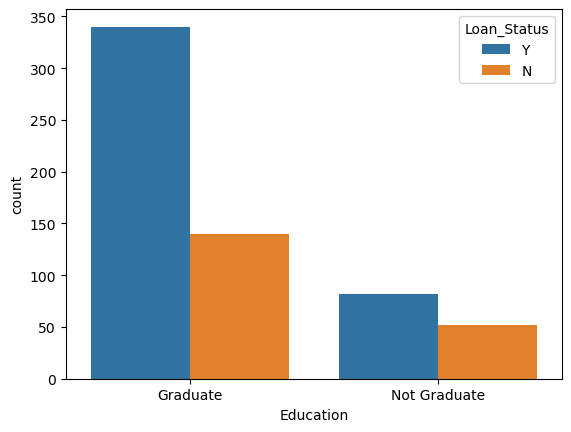

In [74]:
# 30
# count plot to show relationship between Edication and loan status
sns.countplot(x="Education",hue ="Loan_Status", data = df )

In [75]:
# 31
# Is there any impact of Self Employement status on Loan Status
pd.crosstab(df["Self_Employed"],df["Loan_Status"])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


<Axes: xlabel='Self_Employed', ylabel='count'>

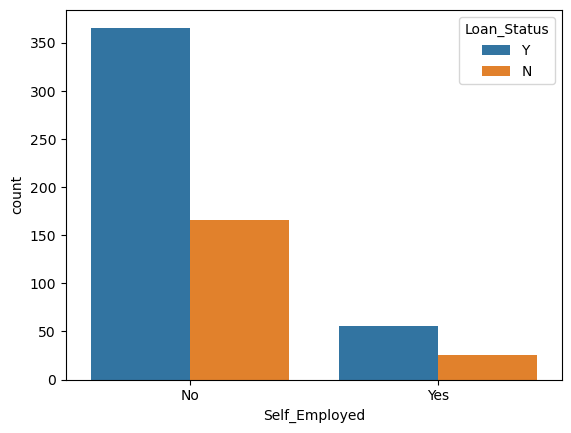

In [76]:
# 32
# Count plot  impact of Self Employement status on Loan Status
sns.countplot(x="Self_Employed",hue ="Loan_Status", data = df)

In [77]:
# 33
# How is property area related to Loan status
pd.crosstab(df["Property_Area"],df["Loan_Status"])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<Axes: xlabel='Property_Area', ylabel='count'>

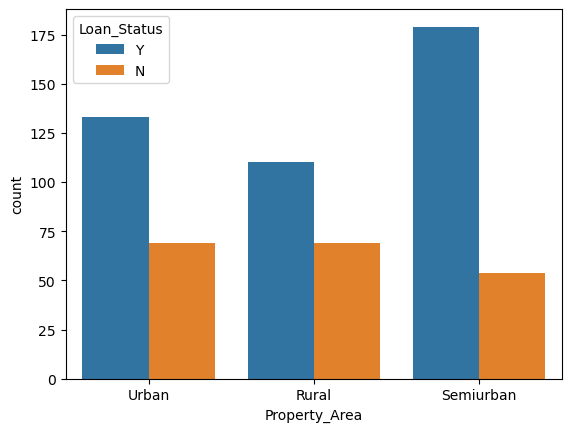

In [78]:
# 34
# Count plot to show How is property area related to Loan status
sns.countplot(x="Property_Area",hue ="Loan_Status", data = df)

In [79]:
# 35
# What is the relationship between Credit History and Loan Status?
pd.crosstab(df["Credit_History"],df["Loan_Status"])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Axes: xlabel='Credit_History', ylabel='count'>

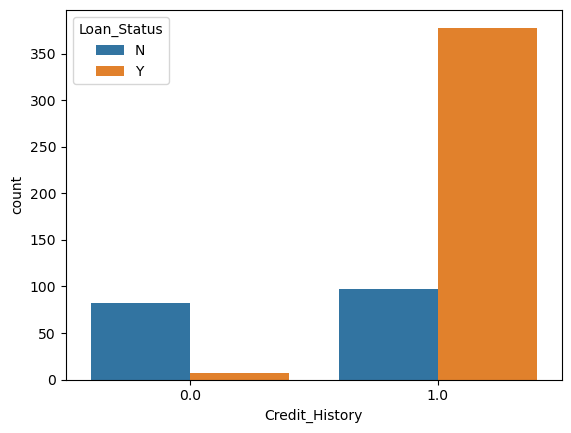

In [80]:
# 36
# Count plot to show the relationship between Credit History and Loan Status?
sns.countplot(x="Credit_History",hue ="Loan_Status", data = df)

In [81]:
# 37
# How do Dependents afftect loan Status
pd.crosstab(df['Dependents'], df['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,113,247
1,36,66
2,25,76
3,18,33


<Axes: xlabel='Dependents', ylabel='count'>

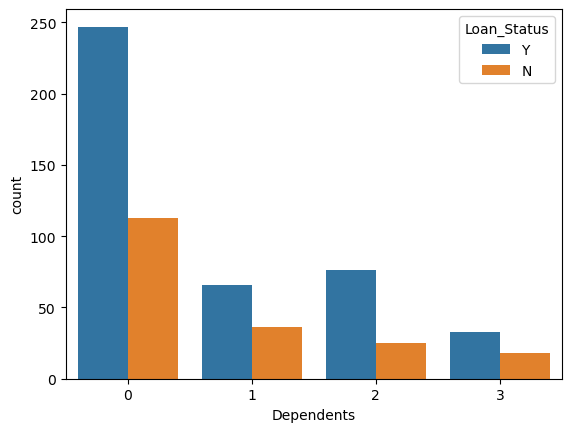

In [82]:
# 38
# Count plot to show how Dependents afftect loan Status
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

In [83]:
# 39
# What is the average LoanAmount for each Loan_Status category?
df.groupby("Loan_Status")["LoanAmount"].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [84]:
# 40
# What is the average LoanAmount for different Education levels?
df.groupby("Education")["LoanAmount"].mean()

Education
Graduate        154.060215
Not Graduate    118.409449
Name: LoanAmount, dtype: float64

In [85]:
# 41
#  What is the average overall_income for each Loan_Status?
df.groupby("Loan_Status")["overall_income"].mean()

Loan_Status
N    7323.885417
Y    6888.585118
Name: overall_income, dtype: float64

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

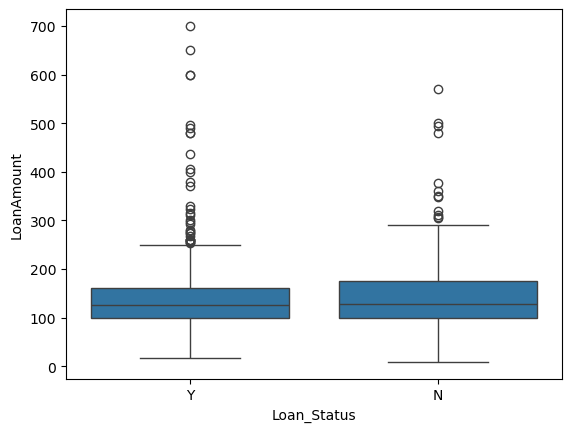

In [86]:
# 42
#  What is the distribution of LoanAmount for each Loan_Status?
sns.boxplot(x="Loan_Status",y = "LoanAmount",data = df)

<Axes: xlabel='Loan_Status', ylabel='overall_income'>

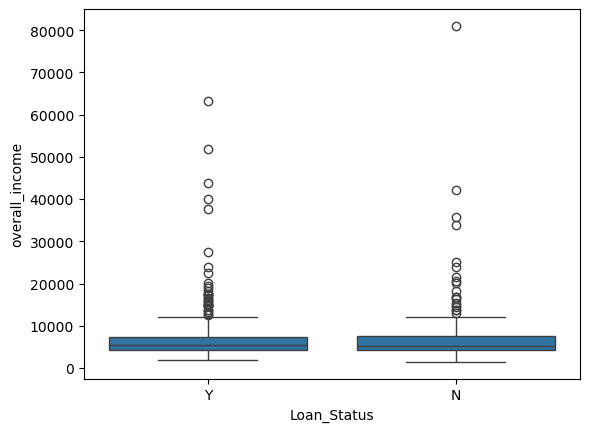

In [87]:
# 43
# What is the distribution of overall_income for each Loan_Status? 
sns.boxplot(x="Loan_Status",y="overall_income",data = df)

In [88]:
# 44
# What is the average LoanAmount for different Property_Area categories?
df.groupby("Property_Area")["LoanAmount"].mean()

Property_Area
Rural        152.260116
Semiurban    145.504386
Urban        142.198953
Name: LoanAmount, dtype: float64

In [89]:
# 45
# What is the average LoanAmount based on Credit_History?
df.groupby("Credit_History")["LoanAmount"].mean()

Credit_History
0.0    146.717647
1.0    144.786026
Name: LoanAmount, dtype: float64

In [90]:
# 46
# What is the average overall_income by Education level?
df.groupby("Education")["overall_income"].mean()

Education
Graduate        7574.908167
Not Graduate    5053.828358
Name: overall_income, dtype: float64

**Multivariate Analysis**

In [91]:
# 47
# How does Property_Area and Credit_History together affect Loan_Status?
pd.crosstab([df['Property_Area'], df['Credit_History']], df['Loan_Status'])

Loan_Status                    N    Y
Property_Area Credit_History         
Rural         0.0             26    2
              1.0             39   98
Semiurban     0.0             26    4
              1.0             23  164
Urban         0.0             30    1
              1.0             35  116

<Axes: xlabel='Property_Area', ylabel='count'>

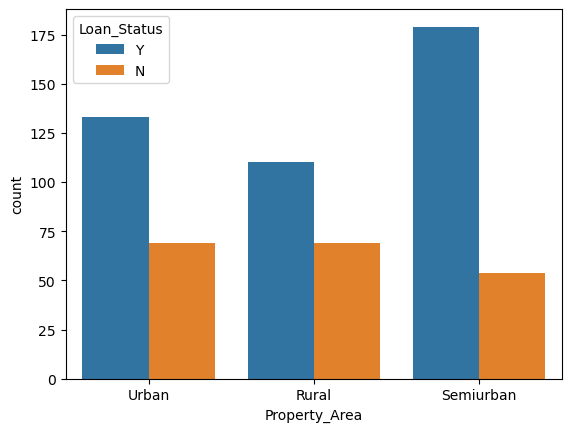

In [92]:
# 48 
# Count plot to show how Property_Area and Credit_History together affect Loan_Status?
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

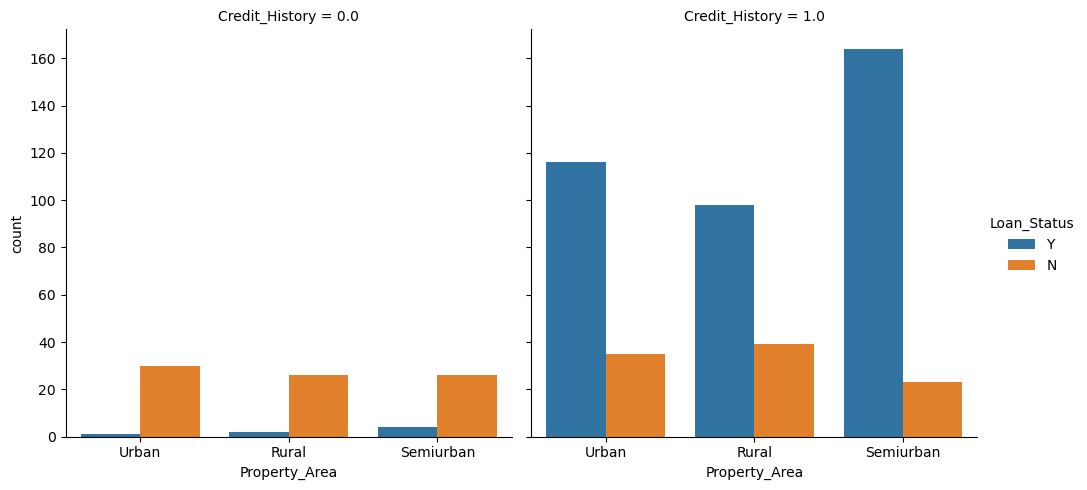

In [93]:
# 49 
# Visualization using cat plot to show how Property_Area and Credit_History together affect Loan_Status?
sns.catplot(x='Property_Area', hue='Loan_Status', col='Credit_History', data=df, kind='count')

In [94]:
# 50
# How Gender and Marital Status together impact Loan_Status?
pd.crosstab([df["Gender"],df["Married"]],df['Loan_Status'])

Loan_Status       N    Y
Gender Married          
Female No        29   51
       Yes        8   24
Male   No        50   83
       Yes      105  264

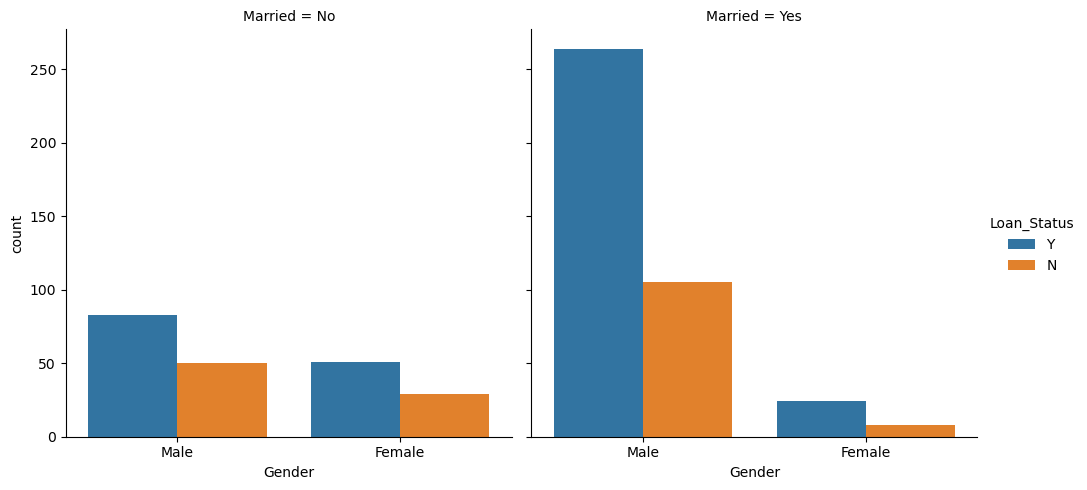

In [95]:
# 51 
# Cat plot to show how Gender and Marital Status together impact Loan_Status?
sns.catplot(x="Gender",hue = "Loan_Status",col="Married",data = df,kind="count")

In [96]:
# 52 
# How do Education and Self_Employed status together affect Loan_Status?
pd.crosstab([df['Education'], df['Self_Employed']], df['Loan_Status'])

Loan_Status                   N    Y
Education    Self_Employed          
Graduate     No             121  294
             Yes             19   46
Not Graduate No              45   72
             Yes              7   10

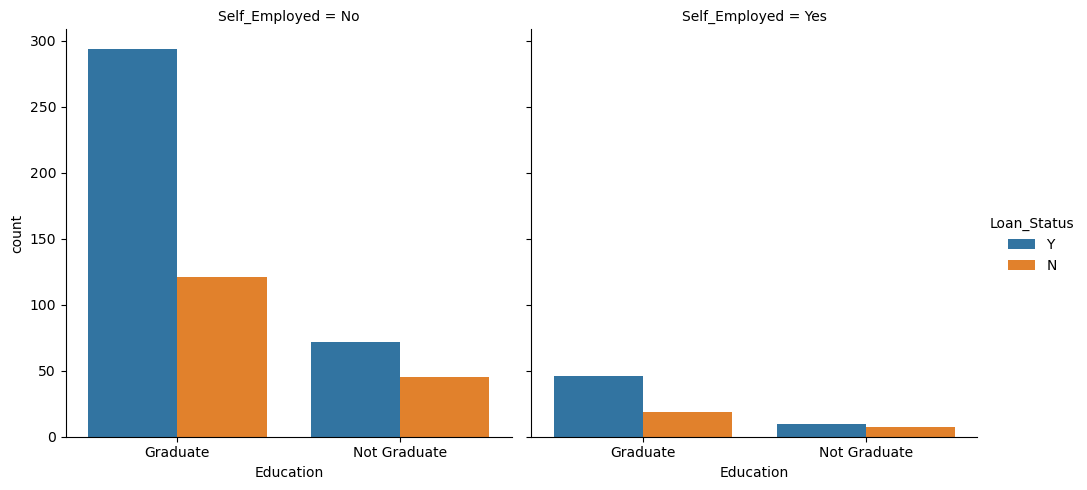

In [101]:
# 53
# Cat plot to show How do Education and Self_Employed status together affect Loan_Status?
sns.catplot(x='Education', hue='Loan_Status', col='Self_Employed', data=df, kind='count')

In [102]:
# 54
# How does Property_Area, Education, and Loan_Status interact?
pd.crosstab([df['Property_Area'], df['Education']], df['Loan_Status'])

Loan_Status                  N    Y
Property_Area Education            
Rural         Graduate      47   84
              Not Graduate  22   26
Semiurban     Graduate      43  144
              Not Graduate  11   35
Urban         Graduate      50  112
              Not Graduate  19   21

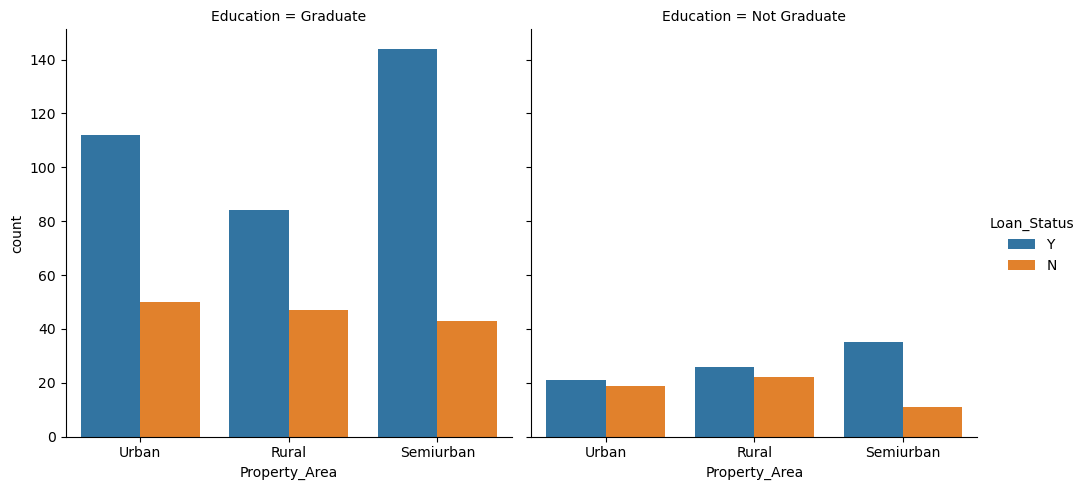

In [103]:
# 55
# Cat plot to show how does Property_Area, Education, and Loan_Status interact?
sns.catplot(x='Property_Area', hue='Loan_Status', col='Education', data=df, kind='count')

In [104]:
# 56 
# What is the average LoanAmount by Property_Area and Loan_Status?
df.groupby(['Property_Area', 'Loan_Status'])['LoanAmount'].mean()

Property_Area  Loan_Status
Rural          N              158.742424
               Y              148.261682
Semiurban      N              154.566038
               Y              142.760000
Urban          N              140.354839
               Y              143.085271
Name: LoanAmount, dtype: float64

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

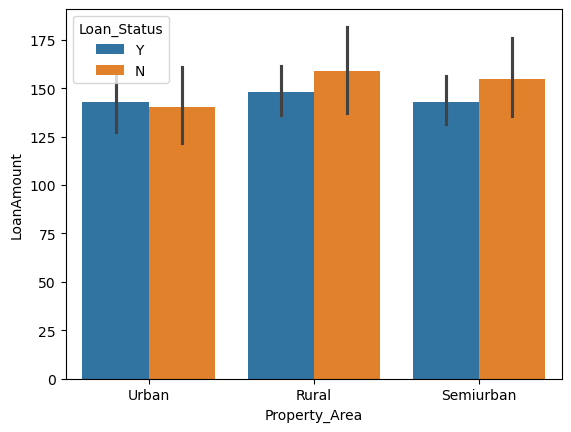

In [105]:
# 57 
# Bar plot for the average LoanAmount by Property_Area and Loan_Status?
sns.barplot(x='Property_Area', y='LoanAmount', hue='Loan_Status', data=df)

In [106]:
# 58
#  What is the average overall_income by Education and Loan_Status?
df.groupby(['Education', 'Loan_Status'])['overall_income'].mean()

Education     Loan_Status
Graduate      N              8225.542857
              Y              7306.999765
Not Graduate  N              4896.346154
              Y              5153.695122
Name: overall_income, dtype: float64

<Axes: xlabel='Education', ylabel='overall_income'>

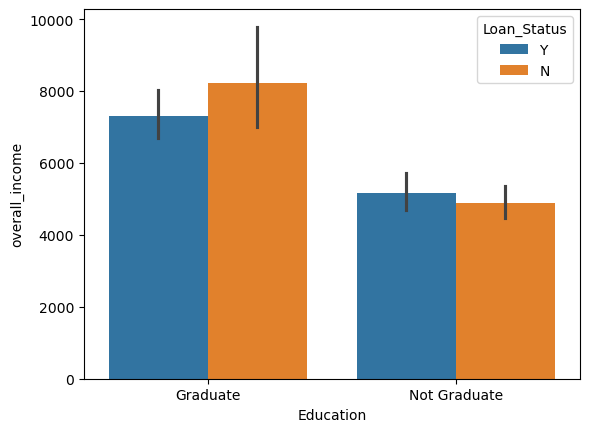

In [107]:
# 59
# BAr plot for the average overall_income by Education and Loan_Status?
sns.barplot(x='Education', y='overall_income', hue='Loan_Status', data=df)

In [108]:
# 60
# What is the average LoanAmount by Credit_History and Loan_Status?
df.groupby(['Credit_History', 'Loan_Status'])['LoanAmount'].mean()

Credit_History  Loan_Status
0.0             N              141.371795
                Y              206.285714
1.0             N              155.604396
                Y              142.103542
Name: LoanAmount, dtype: float64

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

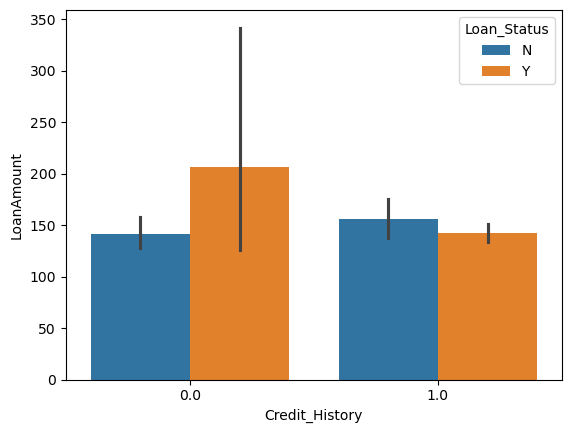

In [109]:
# 61
# BAr plot fot the average LoanAmount by Credit_History and Loan_Status?
sns.barplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=df)

In [110]:
# 62
# What is the average overall_income by Property_Area and Loan_Status?
df.groupby(['Property_Area', 'Loan_Status'])['overall_income'].mean()

Property_Area  Loan_Status
Rural          N              7934.028986
               Y              6738.946545
Semiurban      N              6860.055556
               Y              6798.016760
Urban          N              7076.739130
               Y              7134.239098
Name: overall_income, dtype: float64

<Axes: xlabel='Property_Area', ylabel='overall_income'>

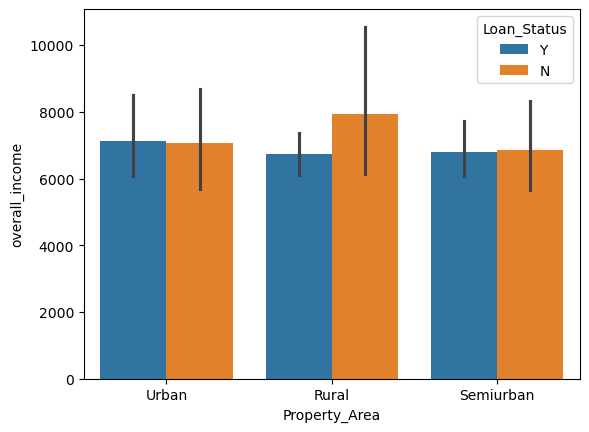

In [111]:
# 63
# bar plot for the average overall_income by Property_Area and Loan_Status?
sns.barplot(x='Property_Area', y='overall_income', hue='Loan_Status', data=df)

<Axes: >

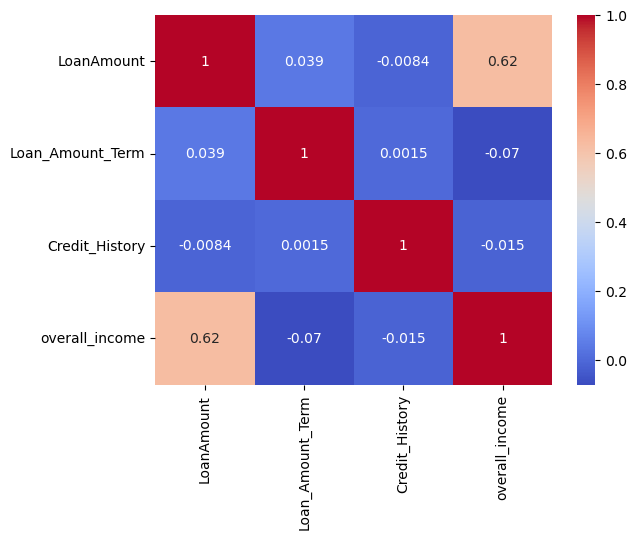

In [112]:
# 64
# What is the correlation between numerical variables like LoanAmount, Loan_Amount_Term, overall_income, and Credit_History?
corr_matrix = df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'overall_income']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

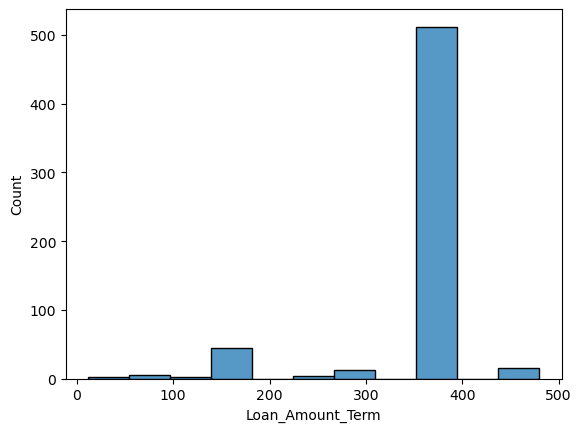

In [114]:
# 65
# What is the distribution of Loan amount term
sns.histplot(df['Loan_Amount_Term'])

## *List of observations made**